In [1]:
from datasets import load_dataset, DatasetDict, Dataset
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification
)
from data import RationalWeight
from data import plotDistribution
from data import plotRocAuc
from data import binaryMetricsCompute
from data import plotConfusionMatrix

%load_ext autoreload
%autoreload 2

In [2]:
id2label = {0: "Negative", 1: "Positive"}
label2id = {"Negative": 0, "Positive": 1}
data_files = {'train': 'train.parquet', 'test': 'test.parquet'}
dataset = load_dataset('../datasets/imdbstfd', data_files=data_files)
dataset = dataset.shuffle(seed=88)
model = AutoModelForSequenceClassification.from_pretrained(
    "../models/bert-base-uncased-IMDB-retrain", num_labels=2, id2label=id2label, label2id=label2id
)
model.eval()
tokenizer = AutoTokenizer.from_pretrained("../models/bert-base-uncased-IMDB-retrain", use_fast=True)

In [3]:
for name, param in model.named_parameters():
    print(name)

bert.embeddings.word_embeddings.weight
bert.embeddings.position_embeddings.weight
bert.embeddings.token_type_embeddings.weight
bert.embeddings.LayerNorm.weight
bert.embeddings.LayerNorm.bias
bert.encoder.layer.0.attention.self.query.weight
bert.encoder.layer.0.attention.self.query.bias
bert.encoder.layer.0.attention.self.key.weight
bert.encoder.layer.0.attention.self.key.bias
bert.encoder.layer.0.attention.self.value.weight
bert.encoder.layer.0.attention.self.value.bias
bert.encoder.layer.0.attention.output.dense.weight
bert.encoder.layer.0.attention.output.dense.bias
bert.encoder.layer.0.attention.output.LayerNorm.weight
bert.encoder.layer.0.attention.output.LayerNorm.bias
bert.encoder.layer.0.intermediate.dense.weight
bert.encoder.layer.0.intermediate.dense.bias
bert.encoder.layer.0.output.dense.weight
bert.encoder.layer.0.output.dense.bias
bert.encoder.layer.0.output.LayerNorm.weight
bert.encoder.layer.0.output.LayerNorm.bias
bert.encoder.layer.1.attention.self.query.weight
bert.enc

2025-01-16 22:16:13,605 data INFO  
 One sigma: [-0.02907184886498726, 0.029134806220099563], 
 Two sigma: [-0.05817517640753067, 0.058238133762642974], 
 Three sigma: [-0.08727850395007408, 0.08734146130518639]
2025-01-16 22:16:13,606 data INFO bert.embeddings.word_embeddings.weight
2025-01-16 22:16:13,607 data INFO bert.embeddings.position_embeddings.weight
2025-01-16 22:16:13,607 data INFO bert.embeddings.token_type_embeddings.weight
2025-01-16 22:16:13,608 data INFO bert.embeddings.LayerNorm.weight
2025-01-16 22:16:13,608 data INFO bert.embeddings.LayerNorm.bias
2025-01-16 22:16:13,609 data INFO bert.encoder.layer.0.attention.self.query.weight
2025-01-16 22:16:13,610 data INFO bert.encoder.layer.0.attention.self.query.bias
2025-01-16 22:16:13,610 data INFO bert.encoder.layer.0.attention.self.key.weight
2025-01-16 22:16:13,611 data INFO bert.encoder.layer.0.attention.self.key.bias
2025-01-16 22:16:13,611 data INFO bert.encoder.layer.0.attention.self.value.weight
2025-01-16 22:16:13,


Number of ZERO: 0;
Percent of ZERO: 0.0;
    



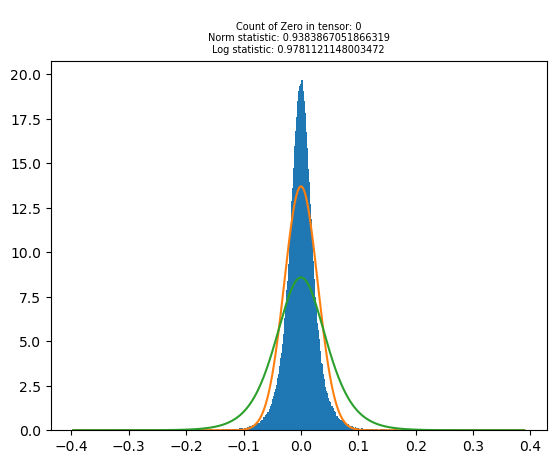

In [4]:
original = RationalWeight(model, tokenizer, dataset)
layer = "bert.pooler.dense.weight"
one, two, three = original.threeSigmaCompute(layer)
original.weightFreeze()
originalLayer = original.layerSearch(layer)
plotDistribution(originalLayer)

Accuracy: 0.8;
ROC AUC score: 0.9155844155844155, 0.0844155844155844;
F1: 0.7727272727272727
Precision: 0.7727272727272727;
Recall: 0.7727272727272727


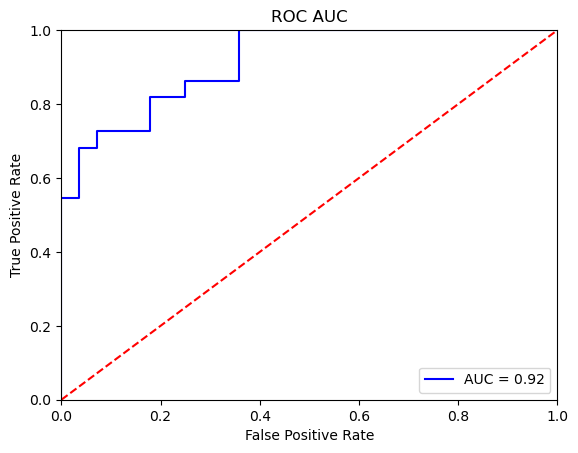

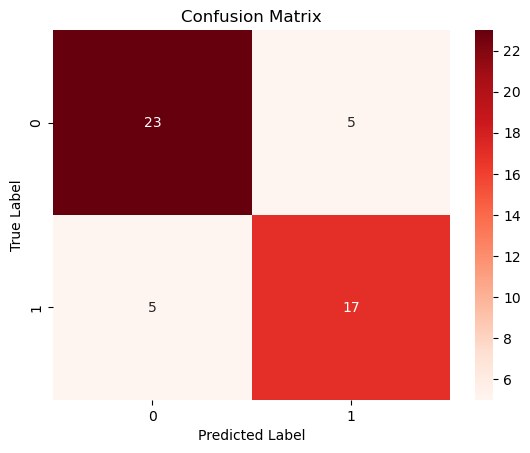

In [6]:
label, outSoftmax, outIndex = original.outputCompute(50)
binaryMetricsCompute(label, outIndex, outSoftmax)
plotRocAuc(label, outSoftmax[:, 1])
plotConfusionMatrix(label, outIndex)

Weights modification

In [65]:
modificated = RationalWeight(model, tokenizer, dataset)
modificated.weightFreeze()

excludeModule = ["classifier", "bias"]
layerPruning = modificated.weightRationalizationWithoutModule(excludeModule, sigma=1, scale=2, inside=True)


Number of ZERO: 16678207;
Percent of ZERO: 0.7115004062652588;
        


Number of ZERO: 293633;
Percent of ZERO: 0.7467473745346069;
        


Number of ZERO: 1503;
Percent of ZERO: 0.978515625;
        


Number of ZERO: 721;
Percent of ZERO: 0.9388021230697632;
        


Number of ZERO: 412498;
Percent of ZERO: 0.699357807636261;
        


Number of ZERO: 416856;
Percent of ZERO: 0.7067463994026184;
        


Number of ZERO: 408733;
Percent of ZERO: 0.6929745078086853;
        


Number of ZERO: 420963;
Percent of ZERO: 0.7137095332145691;
        


Number of ZERO: 747;
Percent of ZERO: 0.97265625;
        


Number of ZERO: 1628784;
Percent of ZERO: 0.69036865234375;
        


Number of ZERO: 1657422;
Percent of ZERO: 0.7025070190429688;
        


Number of ZERO: 723;
Percent of ZERO: 0.94140625;
        


Number of ZERO: 410228;
Percent of ZERO: 0.6955091953277588;
        


Number of ZERO: 411673;
Percent of ZERO: 0.6979590654373169;
        


Number of ZERO: 409431;


Accuracy: 0.58;
ROC AUC score: 0.5892857142857143, 0.41071428571428575;
F1: 0.6666666666666667
Precision: 0.5121951219512195;
Recall: 0.9545454545454546


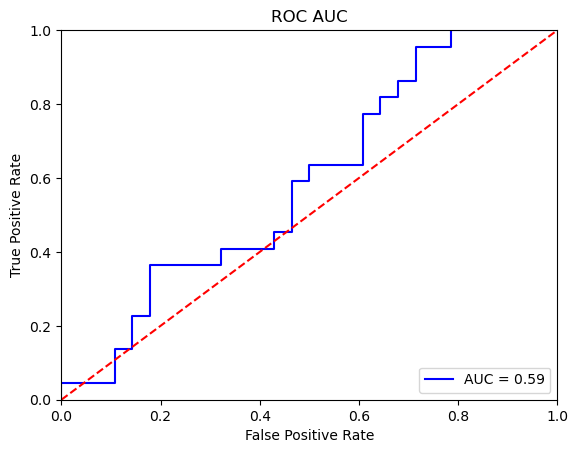

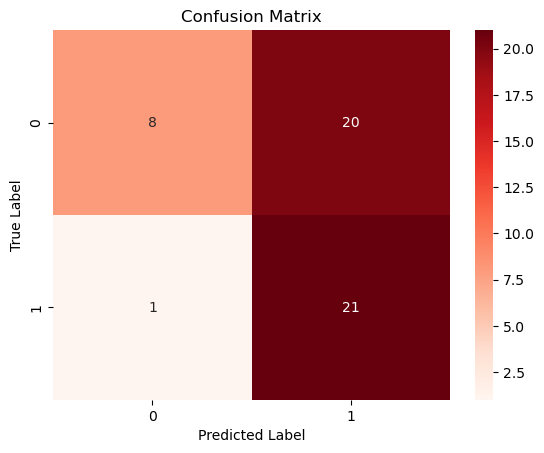

In [66]:
labelMod, softMod, predMod = modificated.outputCompute(50)
binaryMetricsCompute(labelMod,predMod, softMod)
plotRocAuc(labelMod, softMod[:, 1])
plotConfusionMatrix(labelMod, predMod)


Number of ZERO: 467035;
Percent of ZERO: 0.7918209433555603;
    



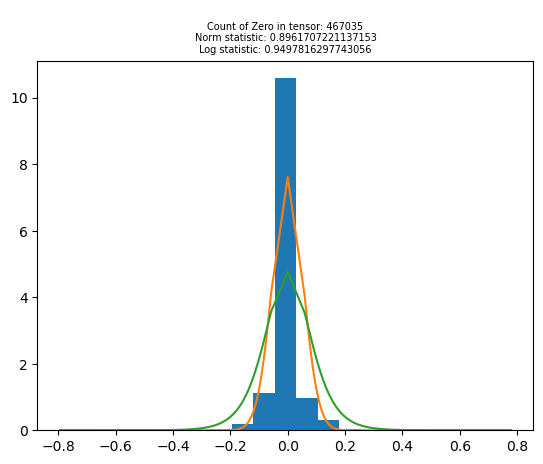

In [67]:
lay = "bert.pooler.dense.weight"
lay = modificated.layerSearch(layer)
plotDistribution(lay)

In [64]:
layerPruning

['bert.embeddings.word_embeddings.weight',
 'bert.embeddings.position_embeddings.weight',
 'bert.embeddings.token_type_embeddings.weight',
 'bert.embeddings.LayerNorm.weight',
 'bert.encoder.layer.0.attention.self.query.weight',
 'bert.encoder.layer.0.attention.self.key.weight',
 'bert.encoder.layer.0.attention.self.value.weight',
 'bert.encoder.layer.0.attention.output.dense.weight',
 'bert.encoder.layer.0.attention.output.LayerNorm.weight',
 'bert.encoder.layer.0.intermediate.dense.weight',
 'bert.encoder.layer.0.output.dense.weight',
 'bert.encoder.layer.0.output.LayerNorm.weight',
 'bert.encoder.layer.1.attention.self.query.weight',
 'bert.encoder.layer.1.attention.self.key.weight',
 'bert.encoder.layer.1.attention.self.value.weight',
 'bert.encoder.layer.1.attention.output.dense.weight',
 'bert.encoder.layer.1.attention.output.LayerNorm.weight',
 'bert.encoder.layer.1.intermediate.dense.weight',
 'bert.encoder.layer.1.output.dense.weight',
 'bert.encoder.layer.1.output.LayerNorm.w